In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


# Importing the required libraries

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [3]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the data into labels

In [5]:
X_train = train_data.drop(labels = ["label"],axis = 1) 
Y_train = train_data["label"]
Y_train = to_categorical(Y_train, num_classes = 10)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

In [7]:
X_train.shape

(33600, 784)

# Reshaping the training and testing values

In [8]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

# Data Preprocessing

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the training set

In [11]:
train = train_datagen.flow(X_train, Y_train, batch_size = 128)

# Creating the test set

In [12]:
test = test_datagen.flow(X_test, Y_test, batch_size = 128)

# Add Early Stopping

In [13]:
callback = EarlyStopping(monitor='loss', patience=8, restore_best_weights=True)

# Building the CNN

In [14]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu', input_shape = [28, 28, 1]))

# Step 2 - Pooling

In [16]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'valid'))

# Adding a more convolutional layer

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding='valid'))

In [18]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding='valid'))
cnn.add(Droupout(0.5))

NameError: name 'Droupout' is not defined

# Step 3 - Flattening

In [19]:
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection

In [20]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Step 5 - Output Layer

In [21]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Training the CNN

In [22]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training

In [23]:
model = cnn.fit_generator(train, epochs = 100, validation_data = test, callbacks = [callback])

Epoch 1/100
263/263 [==============================] - 8s 30ms/step - loss: 0.3714 - accuracy: 0.8920 - val_loss: 0.1136 - val_accuracy: 0.9643
Epoch 2/100
263/263 [==============================] - 8s 29ms/step - loss: 0.0968 - accuracy: 0.9696 - val_loss: 0.0740 - val_accuracy: 0.9780
Epoch 3/100
263/263 [==============================] - 8s 29ms/step - loss: 0.0688 - accuracy: 0.9782 - val_loss: 0.0590 - val_accuracy: 0.9811
Epoch 4/100
263/263 [==============================] - 8s 31ms/step - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 5/100
263/263 [==============================] - 8s 30ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0487 - val_accuracy: 0.9855
Epoch 6/100
263/263 [==============================] - 8s 32ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0368 - val_accuracy: 0.9860
Epoch 7/100
263/263 [==============================] - 8s 30ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0386 - val_accuracy:

In [24]:
cnn.evaluate(X_test,Y_test,verbose=2)

263/263 - 1s - loss: 11.9878 - accuracy: 0.9892


[11.987835884094238, 0.9891666769981384]

# Checking the training and validation loss

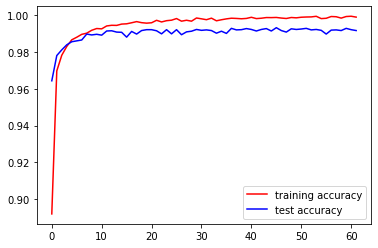

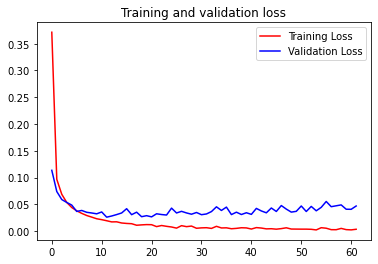

In [25]:
accuracy = model.history['accuracy']
loss = model.history['loss']
val_accuracy = model.history['val_accuracy']
val_loss = model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'training accuracy')
plt.plot(epochs,val_accuracy,'b',label = 'test accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluating the trained model on test data

In [26]:
test_data.shape


(28000, 784)

In [27]:
test_data /= 256 
test_data = test_data.values.reshape(-1,28,28,1)
results = cnn.predict(test_data)

In [28]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name = 'Label')

# Creating the Submission file

In [29]:
submission = pd.concat([pd.Series(range(1,28001),name = 'ImageId'),results],axis = 1)

In [30]:
submission.to_csv('./submission.csv',index = False)